# Introduction to Importing Data, Using Tables and Creating Graphs 

## Introduction

This is an iPython notebook! An iPython notebook allows us to run code (Python), display graphs, and record analyses all in one place!

## Quick Start Guide

- Each block of code or text is called a "cell"
- To select a cell, click on it. You should see an outline around the cell you have selected. To edit a cell, double click it (you'll be doing this to answer questions).
- To run a cell, first select it, then hold down shift and press enter. That's it!
- It's important to run cells in order, starting from the top of the notebook. All of the code works together, and relies on being run in the correct order for everything to work!

#### In this notebook we will be learning to import data, clean it, make tables and create visualizations. 


**SAM-NOTE**: you call python modules packages in this notebook, but modules in the next one. You should be conistant, and I think use the correct term (Module). But, I understand that this is a data science "module" as well, and so the terms could be confusing!


Here are just some code packages we will be using today. Most of the cells that contain code have words/phrases that are preceded by a '#'. The '#' indicates that the phrase following is a comment. Comments are placed within code to describe its functions without actually affecting the code itself!

In [17]:
%%capture 
# Above line prevents the output from being displayed, since there is a 
# lot of text from the installation of the datascience module

# Do not change, just run this cell
!pip install datascience;

import numpy as np
from datascience import *

import matplotlib
%matplotlib inline 
import matplotlib.pyplot as plots
plots.style.use("fivethirtyeight")


## Creating Tables


### Importing

First, we need data. Creating tables from imported data is a good way of organizing a lot of information into an easy-to-read medium. 

Data may be retrieved from an outside source.  In general, to import data from a .csv file, we write Table.read_table("file_name"). These file names end in .csv to show data type. This data type is popular and can be imported/exported from programs such as Microsoft Excel or OpenOffice Calc. 
 
An example is shown below using U.S. Census data. 

In [18]:
Table.read_table("http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/asrh/nc-est2015-agesex-res.csv")

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015
0,0,3944153,3944160,3951330,3963087,3926540,3931141,3949775,3978038
0,1,3978070,3978090,3957888,3966551,3977939,3942872,3949776,3968564
0,2,4096929,4096939,4090862,3971565,3980095,3992720,3959664,3966583
0,3,4119040,4119051,4111920,4102470,3983157,3992734,4007079,3974061
0,4,4063170,4063186,4077551,4122294,4112849,3994449,4005716,4020035
0,5,4056858,4056872,4064653,4087709,4132242,4123626,4006900,4018158
0,6,4066381,4066412,4073013,4074993,4097605,4142916,4135930,4019207
0,7,4030579,4030594,4043046,4083225,4084913,4108349,4155326,4148360
0,8,4046486,4046497,4025604,4053203,4093177,4095711,4120903,4167887
0,9,4148353,4148369,4125415,4035710,4063152,4104072,4108349,4133564


That's a lot of information. As you can see from the labels on top, this table shows Biological Sex (0=total, 1=male, 2=female), Age,  2010 Census Information, and predictions for U.S. population for the next five years. 

We will use this table later in the notebook.


### From Scratch

There's another way to create tables without using an outside file. To make these tables, first we need to make arrays. Arrays are simply a form of lists that a computer program uses. Let's make two arrays below, one for famous psychologists and one for the year they were born. 

In general, to make an array we use: make_array(attribute #1, attribute #2, ...). We set each of these created arrays equal to a variable name. This means that from now on, we can use that variable name to reference its respective array! Variables make information storage and retrieval much easier. 

In [19]:
psychologist_names= make_array("Freud", "Skinner", "Piaget", "Maslow")
psychologist_birth= make_array(1856, 1904, 1896, 1908)

Now, to make a table using these arrays, we use the general form: Table( ).with_columns("Column Name", array_name, . . .). We assign the created table to a variable (just like the arrays from above), and then type that variable name to display the table. 

In [20]:
psych_table= Table().with_columns("Psychologist", psychologist_names,
                                  "Birth Year", psychologist_birth)
psych_table 

Psychologist,Birth Year
Freud,1856
Skinner,1904
Piaget,1896
Maslow,1908


## Using Tables

We can make criteria to cut down tables. Accessing only the rows, columns, or values specfic to our purpose makes that information easier to understand. Analysis and conclusions can be made when data is more digestible. 

We need to access the census table above and name it for further use. We assign the table to a variable, similar to what we did above!

In [21]:
census_data= Table.read_table("http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/asrh/nc-est2015-agesex-res.csv")
census_data

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015
0,0,3944153,3944160,3951330,3963087,3926540,3931141,3949775,3978038
0,1,3978070,3978090,3957888,3966551,3977939,3942872,3949776,3968564
0,2,4096929,4096939,4090862,3971565,3980095,3992720,3959664,3966583
0,3,4119040,4119051,4111920,4102470,3983157,3992734,4007079,3974061
0,4,4063170,4063186,4077551,4122294,4112849,3994449,4005716,4020035
0,5,4056858,4056872,4064653,4087709,4132242,4123626,4006900,4018158
0,6,4066381,4066412,4073013,4074993,4097605,4142916,4135930,4019207
0,7,4030579,4030594,4043046,4083225,4084913,4108349,4155326,4148360
0,8,4046486,4046497,4025604,4053203,4093177,4095711,4120903,4167887
0,9,4148353,4148369,4125415,4035710,4063152,4104072,4108349,4133564


This notebook can calculate how large this table is with two functions: num_rows and num_columns. The general form for these functions are table.num_rows and table.num_columns. 

Let's use these on the table above. 

In [22]:
census_data.num_rows


306

In [23]:
census_data.num_columns

10

That's a 306 x 10 table! We can first start to cut down this table using only some columns. Let's only include biological sex, age and the estimated base for 2010 census data. 

There are two methods to make a table with select columns included. We could either use the 'select' function or the 'drop' function. 

    'select' can create a new table with only the columns indicated in the parameters 
    'drop' can create a new table with columns NOT indicated in the parameters


Here's an example of two equal codes: (keep in mind that we assign each new table to a new variable, to make organization easier). 

In [24]:
select_census_data= census_data.select("SEX", "AGE", "ESTIMATESBASE2010")
select_census_data


SEX,AGE,ESTIMATESBASE2010
0,0,3944160
0,1,3978090
0,2,4096939
0,3,4119051
0,4,4063186
0,5,4056872
0,6,4066412
0,7,4030594
0,8,4046497
0,9,4148369


In [25]:
drop_census_data= census_data.drop("CENSUS2010POP","POPESTIMATE2010","POPESTIMATE2011","POPESTIMATE2012","POPESTIMATE2013","POPESTIMATE2014","POPESTIMATE2015")
drop_census_data

SEX,AGE,ESTIMATESBASE2010
0,0,3944160
0,1,3978090
0,2,4096939
0,3,4119051
0,4,4063186
0,5,4056872
0,6,4066412
0,7,4030594
0,8,4046497
0,9,4148369


As you can see underneath the table, there are still 296 rows omitted! Our next step is to only include non-gendered data AKA data where SEX=0, neither male or female specific. 

To do this, we need to use a new function "where". The general form of this function is table_name.where(column_name, predicate). 

Some more useful predicates are listed in the table below: (This table is created in the same manner as one of the tables above! See if you can trace the code!)

In [26]:
predicates= make_array("are.equal_to()", "are.not_equal_to()", "are.above()", "are.below()", "are.between()") 
meaning= make_array("find values equal to that indicated","find values not including the one indicated",
                   "find values greater to that indicated", "find values less than that indicated",
                   "find values between the two indicated")
predicates_table=Table().with_columns("Predicate",predicates, "Meaning", meaning)
predicates_table


Predicate,Meaning
are.equal_to(),find values equal to that indicated
are.not_equal_to(),find values not including the one indicated
are.above(),find values greater to that indicated
are.below(),find values less than that indicated
are.between(),find values between the two indicated


To cut our table down to only include sex=0, we may use the predicate are.equal_to(). Note that we are assigning the new table to a new variable. We are referencing the table stored in an older variable (select_census_data), and modifying it. That modification is what is stored in the new variable. 


In [27]:
new_census_data=select_census_data.where("SEX", are.equal_to(0))
new_census_data

SEX,AGE,ESTIMATESBASE2010
0,0,3944160
0,1,3978090
0,2,4096939
0,3,4119051
0,4,4063186
0,5,4056872
0,6,4066412
0,7,4030594
0,8,4046497
0,9,4148369


There are still 92 rows omitted! Let's take every 10th entry to cut this table down a little more. 

To do this we need to use the take function. The take function creates a new table with rows from the original table whose indices(row number) are given. In Python, indices start at 0! 

Here's taking every 10th entry. Inside of the take parentheses is a Python list of numbers from 0 to 90, increasing by 10s. This indicates exactly which rows we want to keep (every 10th row).

In [28]:
census_10_year= new_census_data.take([0,10,20,30,40,50,60,70,80,90])
census_10_year

SEX,AGE,ESTIMATESBASE2010
0,0,3944160
0,10,4172559
0,20,4519556
0,30,4285877
0,40,4383450
0,50,4660457
0,60,3621214
0,70,2043178
0,80,1308608
0,90,435695


Now that sex is all the same, we can drop that column. 

In [29]:
final_census_table= census_10_year.drop("SEX")
final_census_table

AGE,ESTIMATESBASE2010
0,3944160
10,4172559
20,4519556
30,4285877
40,4383450
50,4660457
60,3621214
70,2043178
80,1308608
90,435695


## Visualizations 

Now that we have a manageable table we can start making visualizations! Due to the numerical nature of the census table above, let's first try a scatter plot. 

To execute a scatter plot, we need to use the scatter() function. The general form is table.scatter(column for x axis, column for y axis). An example is shown below.

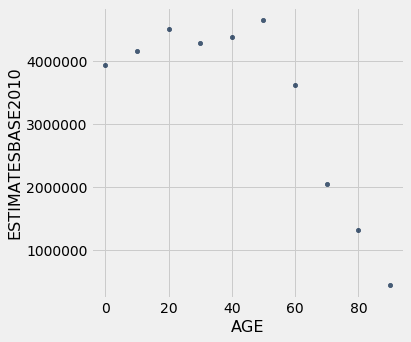

In [30]:
census_scatter=final_census_table.scatter("AGE", "ESTIMATESBASE2010") 
census_scatter

With this data, we can also make a line plot. To do this, we need to use the .plot() function. This works a lot like .scatter() where the general form is table.plot(x column, y column). 

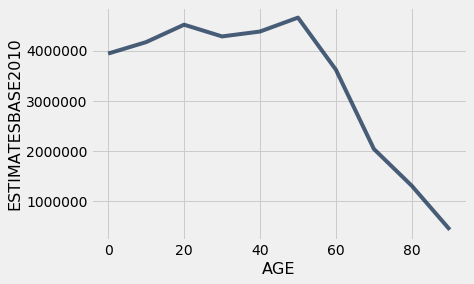

In [31]:
census_line=final_census_table.plot("AGE", "ESTIMATESBASE2010") 
census_line

Now let's introduce a new table with numerical data to try our hands at bar charts and histograms. 
Below is our psychologist birth year table with an added column for popularity. The third column is how many students voted for that psychologist as their favorite. 

In [32]:
student_vote=make_array(12, 15, 3, 29)
new_psych=psych_table.with_columns("Student Vote", student_vote)
new_psych

Psychologist,Birth Year,Student Vote
Freud,1856,12
Skinner,1904,15
Piaget,1896,3
Maslow,1908,29


From this table, we can create a bar graph comparing psychologists and how many students voted for them. Bar graphs follow the same formula as scatter plots and line graphs above, with the general form table.bar(x axis, y axis). 

You can see an example below. 

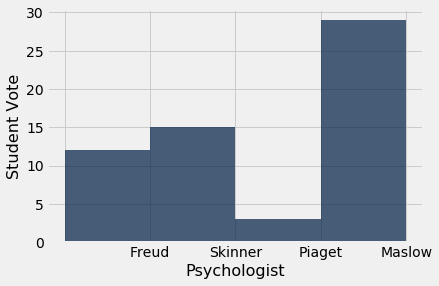

In [33]:
new_psych.bar("Psychologist", "Student Vote")

For a better visualization, you can flip the bar graph horizontally by using the function barh() as shown below. 

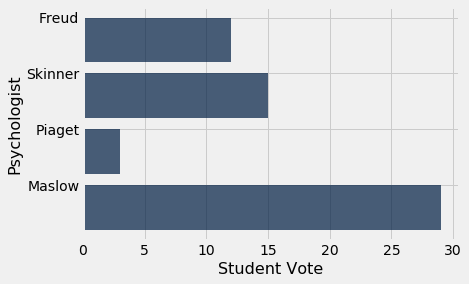

In [34]:
new_psych.barh("Psychologist", "Student Vote")

**SAM-NOTE**: I think a little more explanation of what a histogram is would be useful here. The sentence explaining that bins are continugous intervals should say what they are intervals of.

One last visualization technique we may use is the histogram. This one is a little trickier than the ones above. The function table.hist(x axis, bins(optional), unit(optional)). Bins are contiguous intervals so a dataset may be grouped together. Bin parameters are inclusive on the left end and exclusive on the right on or math wise: [a, b). 
Adjustments can be made on bins to include high or low outliers. We will see this using the census data we have above. 

Here are an example of histograms. 

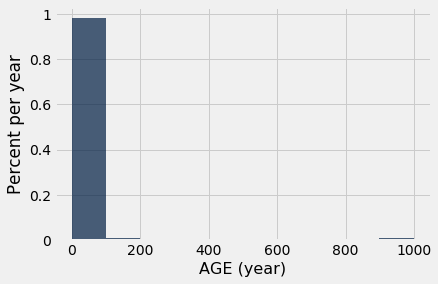

In [35]:
census_data.hist("AGE", unit= "year")

As you can see, binning to include outliers would allow use a better visual of percent population per age. bins and same_bins below both get you the same histogram shown. 

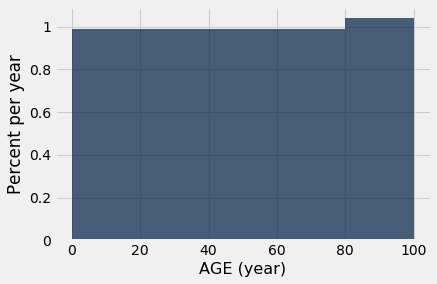

In [36]:
bins= make_array(0,20,40,60,80,100)
same_bins=np.arange(0,120,20)
census_data.hist("AGE", bins= same_bins, unit="year")

As you can tell by this histogram, the number of Americans per age stays consistently the same except for those over betwee 80 and 100. The number of newborns in America is approximately the same as 45 year olds. 

## SUMMARY 

### You've learned a lot in this module! Let's look back on the key parts. 

To import data from a .csv/.txt file, we write Table.read_table("file_name").

To create our own table, we write Table( ).with_columns("Column Name", array_name, . . .) . 

To count number of rows, we use table_name.num_rows.

To count number of columns, we use table_name.num_columns.

To create a new table with only the columns indicated in the parameters, we use table_name.select("COLUMN NAME", ...). 

To create a new table without the columns indicated in the parameters, we use table_name.drop("COLUMN NAME", ...). 

To create a table with only certain values, we can use table_name.where(column_name, predicate).
Useful predicates can be seen in the table below.

In [37]:
predicates_table

Predicate,Meaning
are.equal_to(),find values equal to that indicated
are.not_equal_to(),find values not including the one indicated
are.above(),find values greater to that indicated
are.below(),find values less than that indicated
are.between(),find values between the two indicated


To create a new table with indicated rows from the original table, we use table_name.take([index 1, index 2, . . . ]). Remember in Python indices start at 0!

To execute a scatter plot, we use table.scatter(column for x axis, column for y axis).

To execute a line plot, we use table.plot(x column, y column).

To make a bar graphs, we can use either table.bar(x column, y column) or table.barh(x column, y column). 

To make a histogram, we use table.hist(x axis, bins(optional), unit(optional)). 

With just some simple code, we were able to do an incredible amount of data analysis! Play around with the examples until you feel comfortable with the content of this notebook. We will be using notebooks to analyze your own data sets in the future! Please ask if you have questions!
